Churn
0    5174
1    1869
Name: count, dtype: int64
Churn
0    5174
1    5174
Name: count, dtype: int64
Accuracy: 0.8429951690821256
Precision: 0.8521400778210116
Recall: 0.8350810295519543
ROC-AUC: 0.9256766156658689

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.85      0.84      1021
           1       0.85      0.84      0.84      1049

    accuracy                           0.84      2070
   macro avg       0.84      0.84      0.84      2070
weighted avg       0.84      0.84      0.84      2070



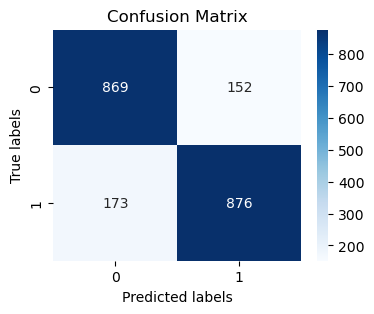

In [ ]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, roc_auc_score, classification_report
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns



data = pd.read_csv('churn.csv')


data.drop('customerID', axis=1, inplace=True)

data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data['TotalCharges'] = data['TotalCharges'].fillna(data['TotalCharges'].mean())

# Encode categorical variables
label_columns = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 
                 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 
                 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

le = LabelEncoder()
for col in label_columns:
    if data[col].nunique() == 2:  
        data[col] = le.fit_transform(data[col])

data = pd.get_dummies(data, columns=[col for col in label_columns if data[col].nunique() > 2], drop_first=True)

# Define features and target
X = data.drop('Churn', axis=1)
y = data['Churn']
print(data['Churn'].value_counts())

# Handle class imbalance with SMOTE
smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)
print(y.value_counts())

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"ROC-AUC: {roc_auc}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()


